# Armenian Demographical Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sckit-learn

I used the official dataset from the Armenian government to show more clearly the situation with demographics in Armenia.
So here is importing the excel file into pandas DataFrame. The information is raw and absolutely not prepared.

In [2]:
demography = pd.read_excel('data/data.xlsx', sheet_name='ՀՀ')
demography

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/մարդ/
2,Տարիքը,2011 մարդահամար,NaN,NaN,2012,NaN,NaN,2013,NaN,NaN,...,NaN,2019,NaN,NaN,2020,NaN,NaN,2021,NaN,NaN
3,NaN,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,...,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը
4,0,22108,19318,41426,22009,19318,41327,22708,19708,42416,...,37431,19130,17222,36352,18799,17043,35842,18910,17209,36119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,80+,24636,44075,68711,24712,44020,68732,26009,45672,71681,...,83290,32122,55605,87727,33237,57864,91101,33380,59058,92438
85,Ընդամենը,1448052,1570802,3018854,1449473,1571903,3021376,1451646,1575233,3026879,...,2972732,1401731,1563538,2965269,1397005,1562689,2959694,1398107,1565144,2963251
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First of all, the "whitespace" should be deleted - there are some empty or not necessary rows at the beginning and at the end of the DataFrame.

In [3]:
demography = demography.drop([ i for i in range(3) ])
demography = demography.drop([ i for i in range(85, 89) ])
demography

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
3,NaN,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,...,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը
4,0,22108,19318,41426,22009,19318,41327,22708,19708,42416,...,37431,19130,17222,36352,18799,17043,35842,18910,17209,36119
5,1,22945,20000,42945,22936,19903,42839,21778,19155,40933,...,40243,19556,17836,37392,19115,17217,36332,18785,17028,35813
6,2,23106,20487,43593,23344,20872,44216,22925,19887,42812,...,41379,21223,19000,40223,19547,17828,37375,19111,17213,36324
7,3,21433,18810,40243,21651,18944,40595,23329,20870,44199,...,42912,21904,19456,41360,21217,18995,40212,19546,17827,37373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,76,7345,10425,17770,7586,10843,18429,7152,11216,18368,...,15757,4537,6782,11319,2536,4241,6777,2318,3975,6293
81,77,4916,6923,11839,5157,7166,12323,7065,10347,17412,...,18054,5805,9321,15126,4353,6581,10934,2339,4076,6415
82,78,5298,7698,12996,4973,7321,12294,4720,6739,11459,...,16232,6584,10684,17268,5469,8959,14428,4110,6348,10458
83,79,5363,7931,13294,5312,8071,13383,4637,6922,11559,...,15790,5630,9636,15266,6219,10251,16470,5021,8531,13552


After that, the header should be fixed. The first row becomes the header and gots deleted. Also an empty coloumn gets a name - "Age".

In [4]:
demography.columns = demography.iloc[0]
demography.reset_index(drop=True, inplace=True)
demography.drop([0], inplace=True)
demography = demography.rename(columns={np.nan: 'Age'})
demography

3,Age,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,...,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը,Տղամարդիկ,Կանայք,Ընդամենը
1,0,22108,19318,41426,22009,19318,41327,22708,19708,42416,...,37431,19130,17222,36352,18799,17043,35842,18910,17209,36119
2,1,22945,20000,42945,22936,19903,42839,21778,19155,40933,...,40243,19556,17836,37392,19115,17217,36332,18785,17028,35813
3,2,23106,20487,43593,23344,20872,44216,22925,19887,42812,...,41379,21223,19000,40223,19547,17828,37375,19111,17213,36324
4,3,21433,18810,40243,21651,18944,40595,23329,20870,44199,...,42912,21904,19456,41360,21217,18995,40212,19546,17827,37373
5,4,20973,18392,39365,21206,18521,39727,21646,18943,40589,...,41354,22788,20113,42901,21897,19445,41342,21209,18991,40200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,76,7345,10425,17770,7586,10843,18429,7152,11216,18368,...,15757,4537,6782,11319,2536,4241,6777,2318,3975,6293
78,77,4916,6923,11839,5157,7166,12323,7065,10347,17412,...,18054,5805,9321,15126,4353,6581,10934,2339,4076,6415
79,78,5298,7698,12996,4973,7321,12294,4720,6739,11459,...,16232,6584,10684,17268,5469,8959,14428,4110,6348,10458
80,79,5363,7931,13294,5312,8071,13383,4637,6922,11559,...,15790,5630,9636,15266,6219,10251,16470,5021,8531,13552


So, the dataset is pretty clear now.

In [5]:
dem_2011 = demography.iloc[: , :4]
dem_2011

3,Age,Տղամարդիկ,Կանայք,Ընդամենը
1,0,22108,19318,41426
2,1,22945,20000,42945
3,2,23106,20487,43593
4,3,21433,18810,40243
5,4,20973,18392,39365
...,...,...,...,...
77,76,7345,10425,17770
78,77,4916,6923,11839
79,78,5298,7698,12996
80,79,5363,7931,13294


The following graphic shows the how many men and women of different ages lived in 2011 in Armenia.

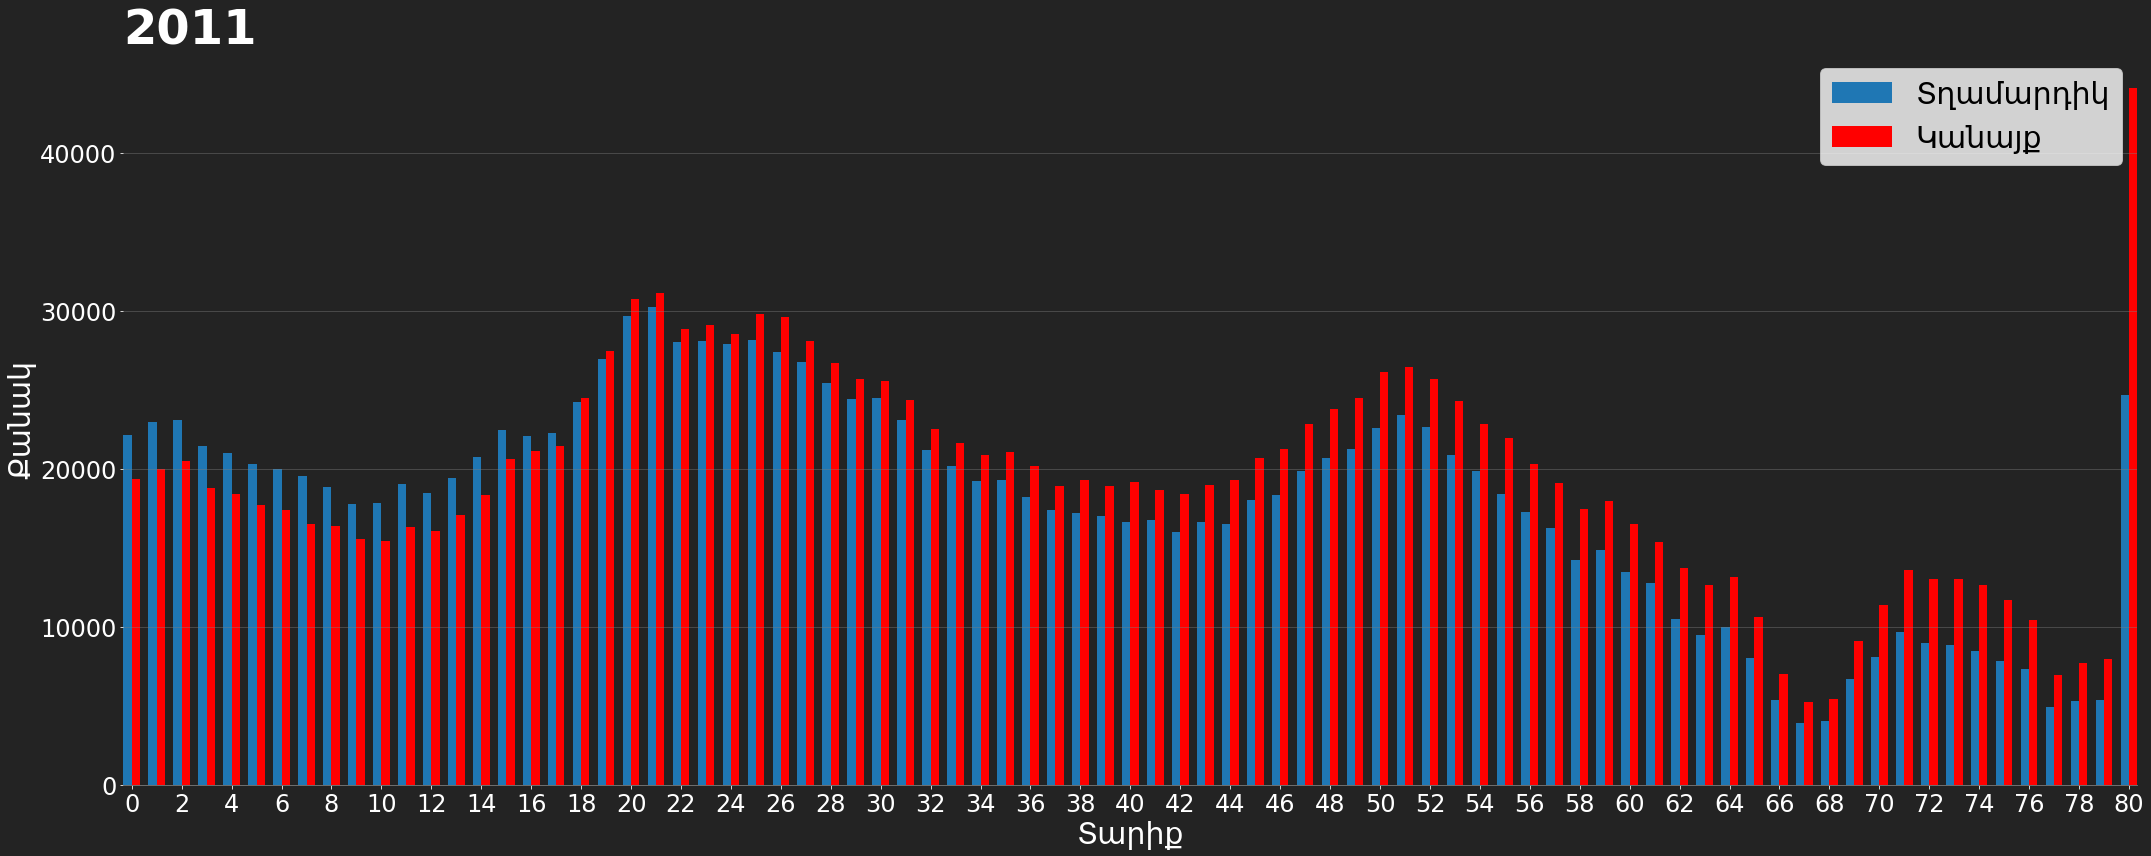

In [6]:
X = dem_2011['Age'].astype(str)
y_men = dem_2011['Տղամարդիկ'].astype(str).astype(int)
y_wom = dem_2011['Կանայք'].astype(str).astype(int)
indices = [ i for i in range(81) ]
width = np.min(np.diff(indices))/3

fig, ax = plt.subplots(figsize=(30, 12))
ax.bar(indices - width/2, y_men, width = width, label="Տղամարդիկ")
ax.bar(indices + width/2, y_wom, width = width, color='red', label="Կանայք")
ax.set_title("2011", loc='left', color='white', fontsize=48, fontweight='bold')
ax.grid(axis='y', color='gray', alpha=0.5)
# ax.bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
ax.set_xlabel('Տարիք', color='white', fontsize=30)
ax.set_ylabel('Քանակ', color='white', fontsize=30)

ax.set_facecolor('#232323')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.set_xticks([ i for i in range(0, 81, 2) ])
ax.tick_params(axis='x', colors='white', labelsize=24)
ax.tick_params(axis='y', colors='white', labelsize=24)
ax.margins(x=0)

fig.set_facecolor('#232323')
plt.legend(fontsize=30)
plt.tight_layout()
plt.show()

Here is the same kind of graphic for 2021.

In [7]:
dem_2021 = demography.iloc[: , -3:]
dem_2021

3,Տղամարդիկ,Կանայք,Ընդամենը
1,18910,17209,36119
2,18785,17028,35813
3,19111,17213,36324
4,19546,17827,37373
5,21209,18991,40200
...,...,...,...
77,2318,3975,6293
78,2339,4076,6415
79,4110,6348,10458
80,5021,8531,13552


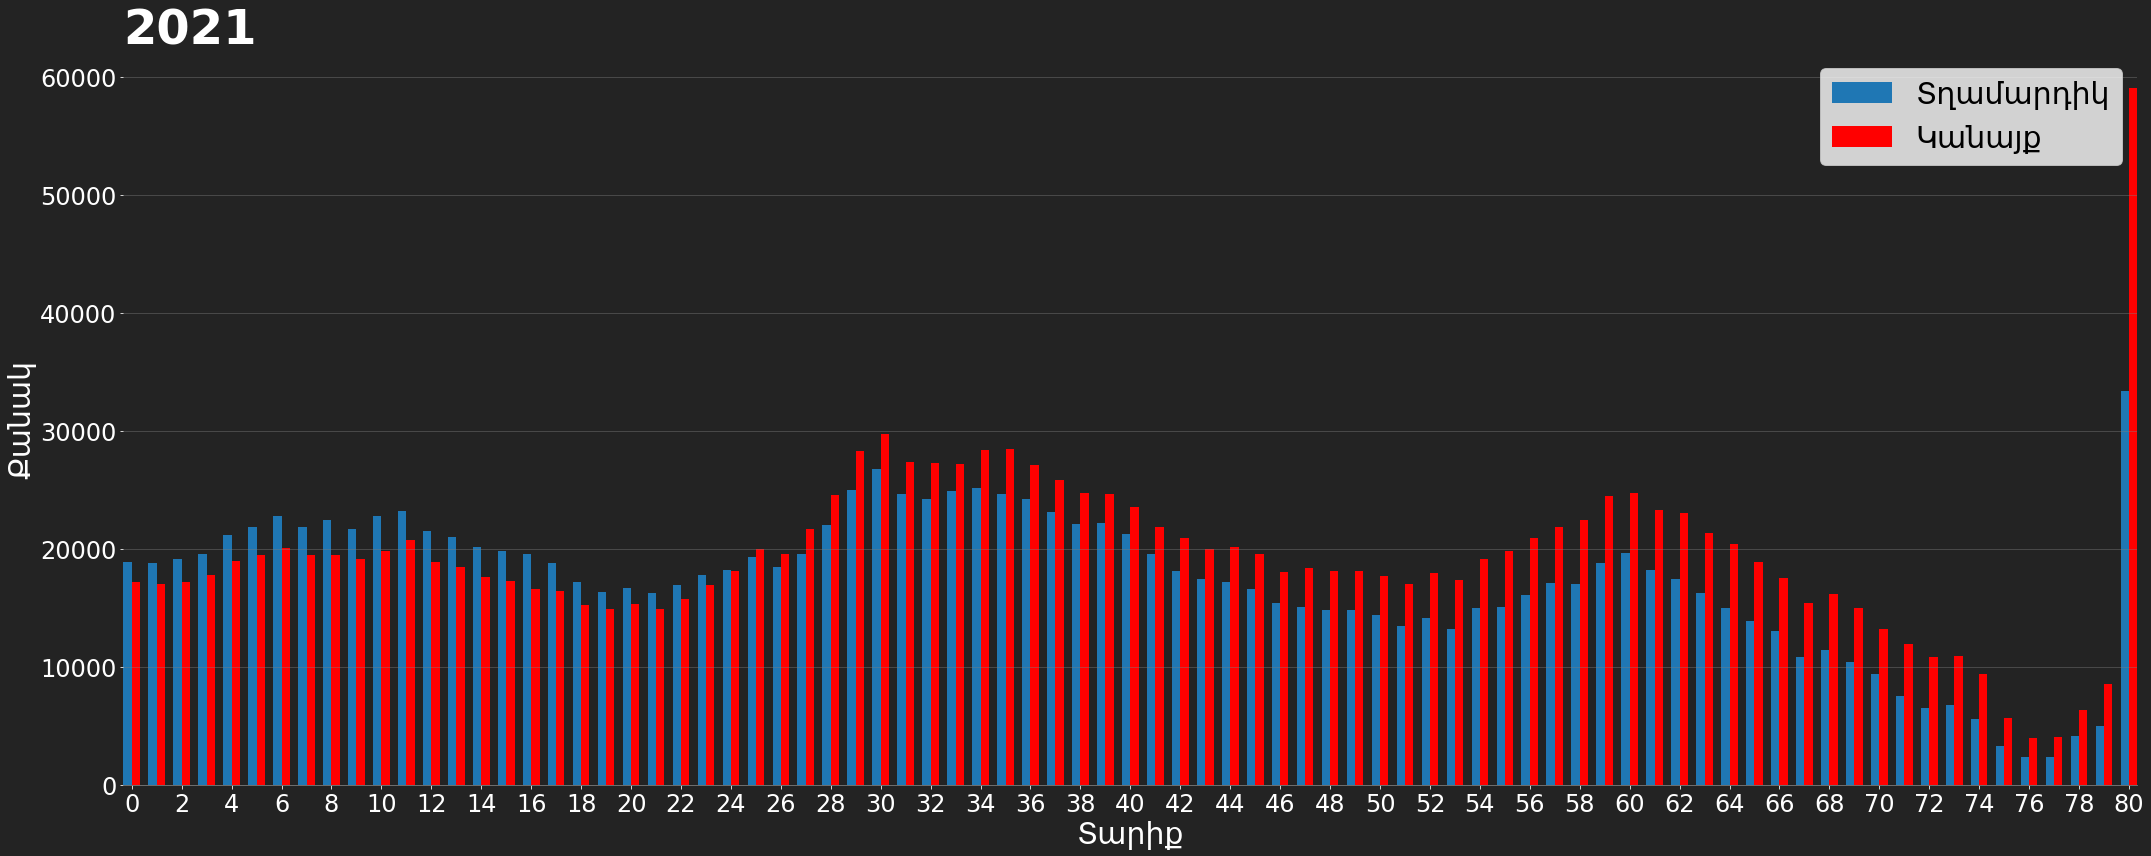

In [8]:
y_men_2021 = dem_2021['Տղամարդիկ'].astype(str).astype(int)
y_wom_2021 = dem_2021['Կանայք'].astype(str).astype(int)
indices = [ i for i in range(81) ]
width = np.min(np.diff(indices))/3

fig, ax = plt.subplots(figsize=(30, 12))

# 2011
# ax.bar(indices - width/2, y_men, width = width, color='white', label="Տղամարդիկ 2011")
# ax.bar(indices + width/2, y_wom, width = width, color='red', label="Կանայք 2011")

# 2021
ax.bar(indices - width/2, y_men_2021, width = width, label="Տղամարդիկ")
ax.bar(indices + width/2, y_wom_2021, width = width, color='red', label="Կանայք")

ax.set_title("2021", loc='left', color='white', fontsize=48, fontweight='bold')
ax.grid(axis='y', color='gray', alpha=0.5)
# ax.bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
ax.set_xlabel('Տարիք', color='white', fontsize=30)
ax.set_ylabel('Քանակ', color='white', fontsize=30)

ax.set_facecolor('#232323')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.set_xticks([ i for i in range(0, 81, 2) ])
ax.tick_params(axis='x', colors='white', labelsize=24)
ax.tick_params(axis='y', colors='white', labelsize=24)
ax.margins(x=0)

fig.set_facecolor('#232323')
plt.legend(fontsize=30)
plt.tight_layout()
plt.show()

This is the comparison between these two years. They are plotted on one figure to show the difference in 10 years.

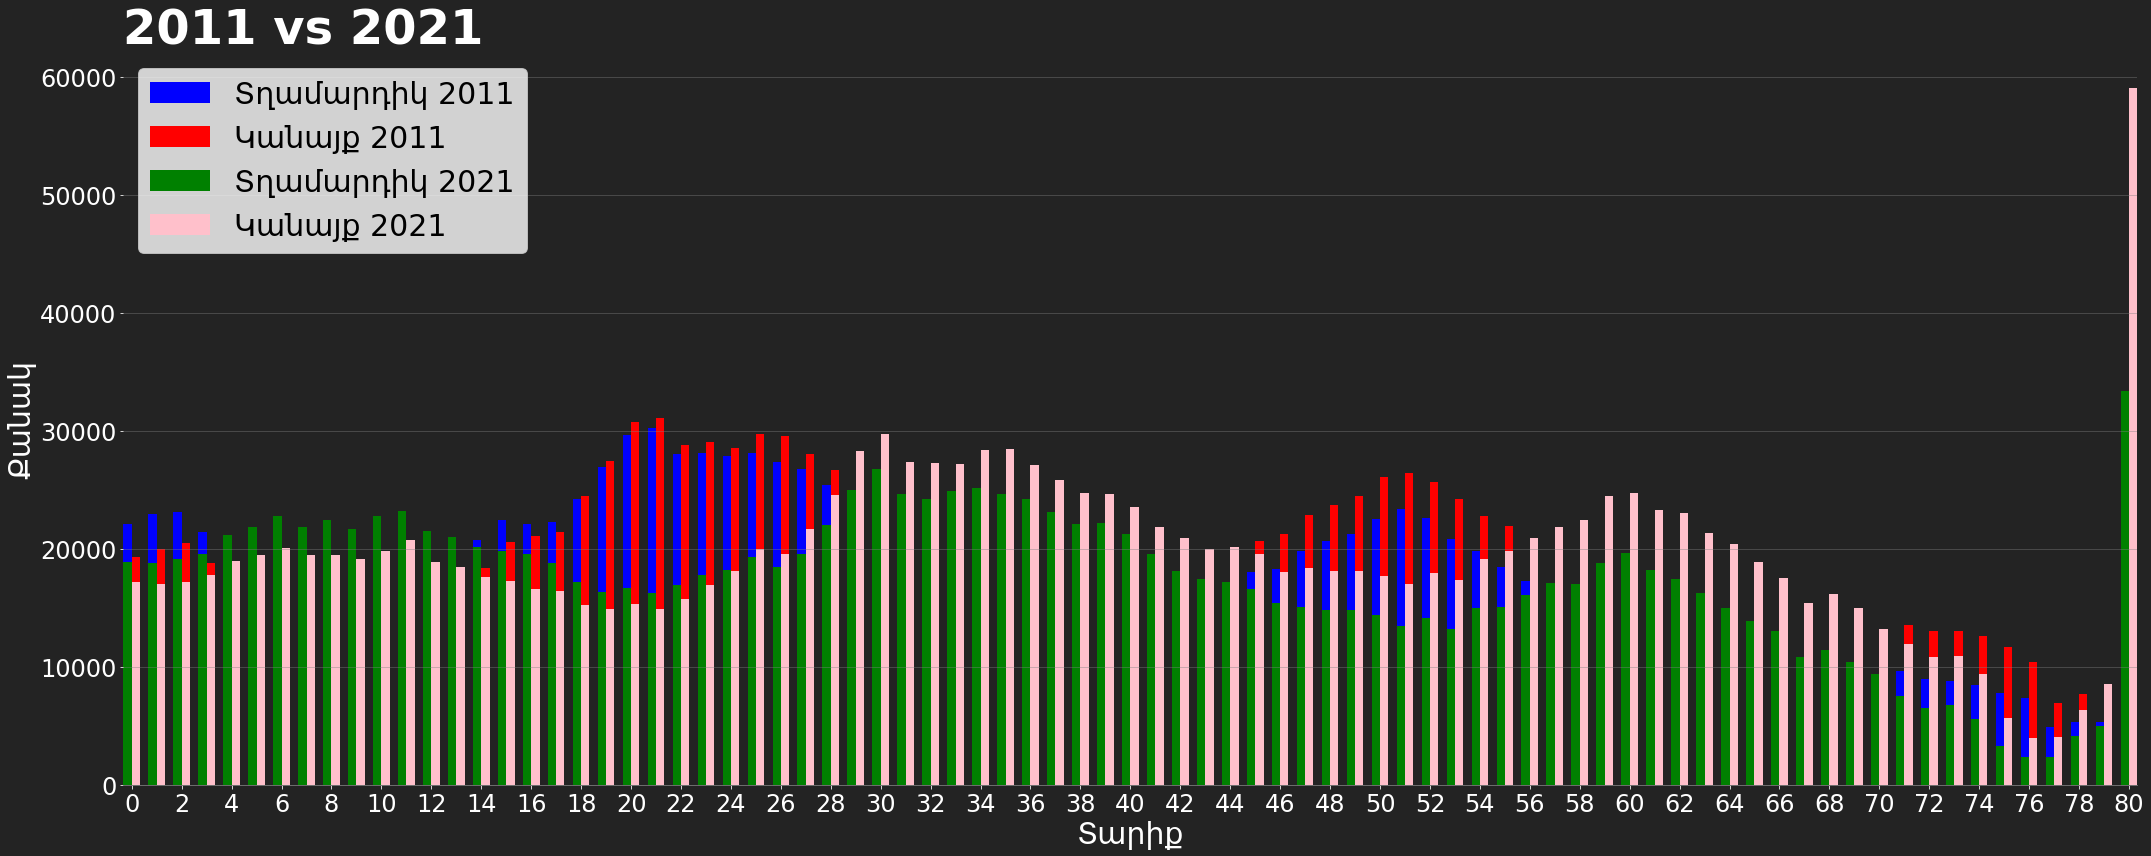

In [9]:
y_men_2021 = dem_2021['Տղամարդիկ'].astype(str).astype(int)
y_wom_2021 = dem_2021['Կանայք'].astype(str).astype(int)
indices = [ i for i in range(81) ]
width = np.min(np.diff(indices))/3

fig, ax = plt.subplots(figsize=(30, 12))

# 2011
ax.bar(indices - width/2, y_men, width = width, color='blue', label="Տղամարդիկ 2011")
ax.bar(indices + width/2, y_wom, width = width, color='red', label="Կանայք 2011")

# 2021
ax.bar(indices - width/2, y_men_2021, width = width, color='green', label="Տղամարդիկ 2021")
ax.bar(indices + width/2, y_wom_2021, width = width, color='pink', label="Կանայք 2021")

ax.set_title("2011 vs 2021", loc='left', color='white', fontsize=48, fontweight='bold')
ax.grid(axis='y', color='gray', alpha=0.5)
# ax.bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
ax.set_xlabel('Տարիք', color='white', fontsize=30)
ax.set_ylabel('Քանակ', color='white', fontsize=30)

ax.set_facecolor('#232323')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.set_xticks([ i for i in range(0, 81, 2) ])
ax.tick_params(axis='x', colors='white', labelsize=24)
ax.tick_params(axis='y', colors='white', labelsize=24)
ax.margins(x=0)

fig.set_facecolor('#232323')
plt.legend(fontsize=30, loc='upper left')
plt.tight_layout()
plt.show()

Now the difference is shown separetely.

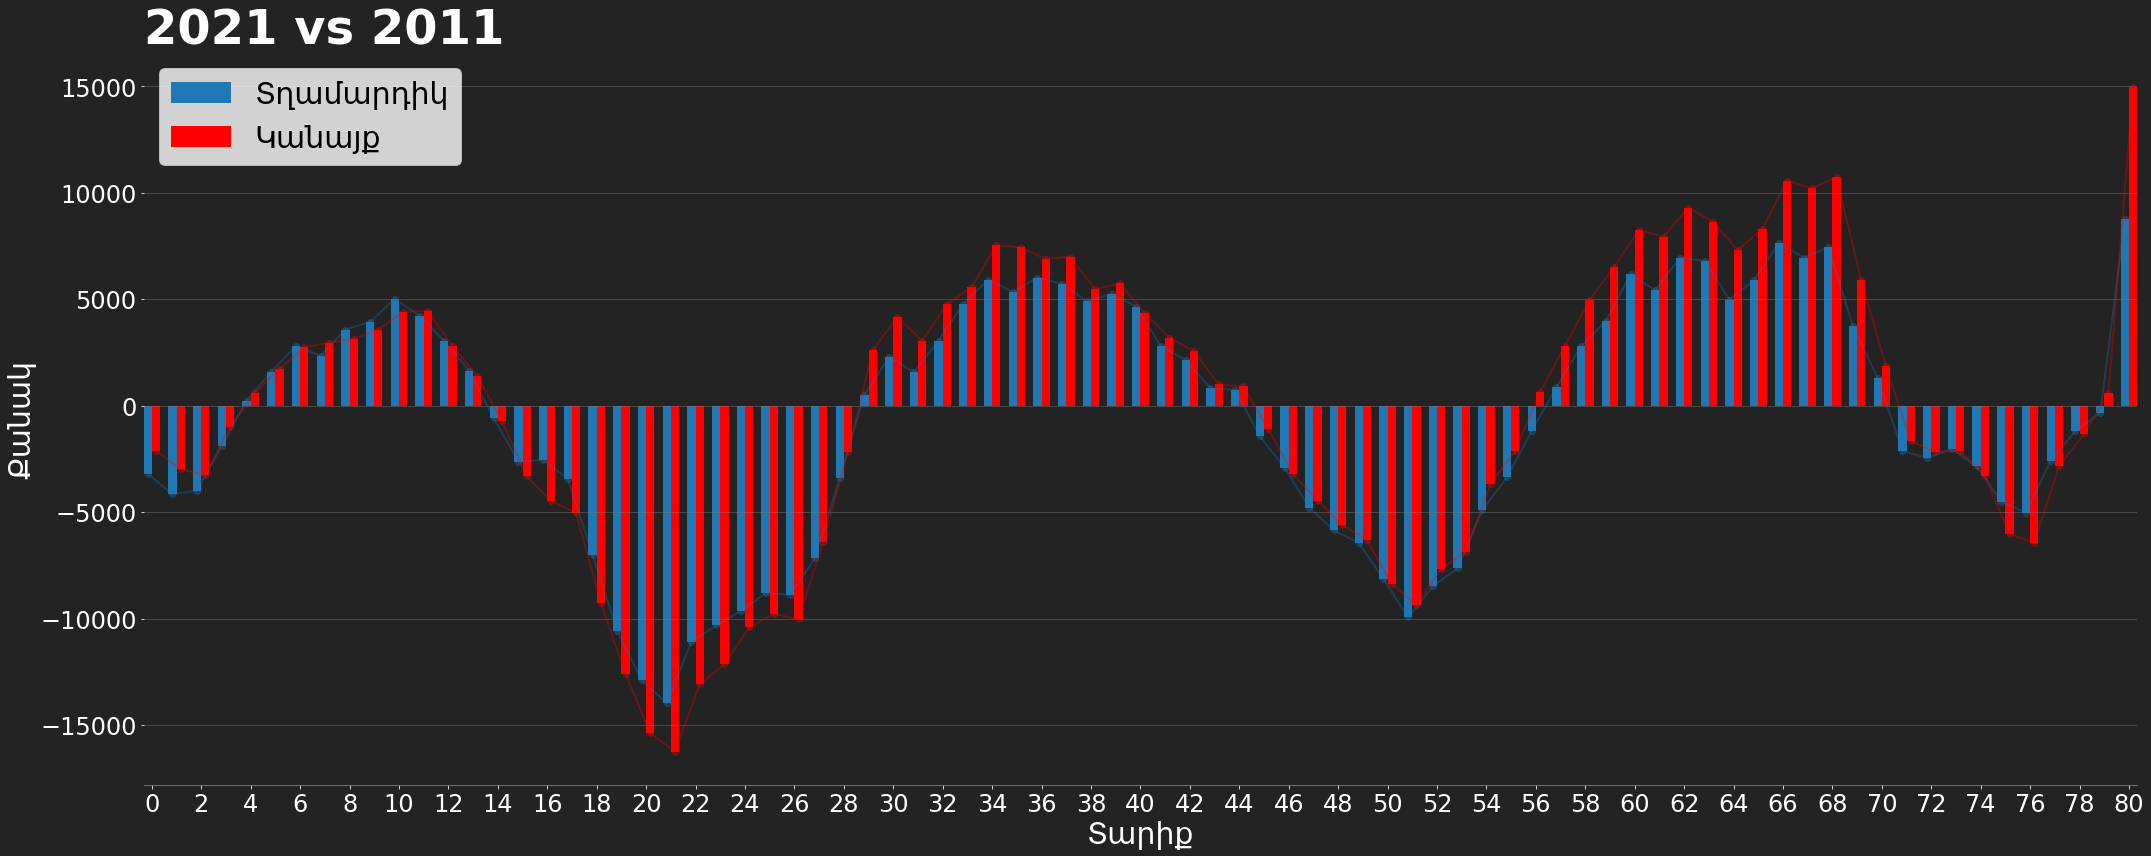

In [10]:
fig, ax = plt.subplots(figsize=(30, 12))

ax.bar(indices - width/2, y_men_2021 - y_men, width = width, label="Տղամարդիկ")
ax.bar(indices + width/2, y_wom_2021 - y_wom, width = width, color='red', label="Կանայք")
ax.plot(indices - width/2, y_men_2021 - y_men, 'o-', linewidth=2, alpha=0.3)
ax.plot(indices + width/2, y_wom_2021 - y_wom, 'o-', color='red', linewidth=2, alpha=0.3)

ax.set_title("2021 vs 2011", loc='left', color='white', fontsize=48, fontweight='bold')
ax.grid(axis='y', color='gray', alpha=0.5)
ax.set_xlabel('Տարիք', color='white', fontsize=30)
ax.set_ylabel('Քանակ', color='white', fontsize=30)

ax.set_facecolor('#232323')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.set_xticks([ i for i in range(0, 81, 2) ])
ax.tick_params(axis='x', colors='white', labelsize=24)
ax.tick_params(axis='y', colors='white', labelsize=24)
ax.margins(x=0)

fig.set_facecolor('#232323')
plt.legend(fontsize=30, loc='upper left')
plt.tight_layout()
plt.show()

As you can see as for 2021 - less people are born (the difference is almost 5000 people) but there are more people of age of 4-14. And the quanitiy of people of young generation (16-28) is critically decreasing. 

Following code is for counting the average age of people in Armenia.

In [11]:
men_average_dataframe = demography['Տղամարդիկ'].astype(str).astype(int)
women_average_dataframe = demography['Կանայք'].astype(str).astype(int)

men_average_dataframe.head()

3,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ,Տղամարդիկ
1,22108,22009,22708,22134,22848,21953,21256,19577,19130,18799,18910
2,22945,22936,21778,22486,21938,22819,21929,21236,19556,19115,18785
3,23106,23344,22925,21764,22451,21923,22804,21917,21223,19547,19111
4,21433,21651,23329,22915,21724,22437,21916,22795,21904,21217,19546
5,20973,21206,21646,23316,22878,21720,22433,21903,22788,21897,21209


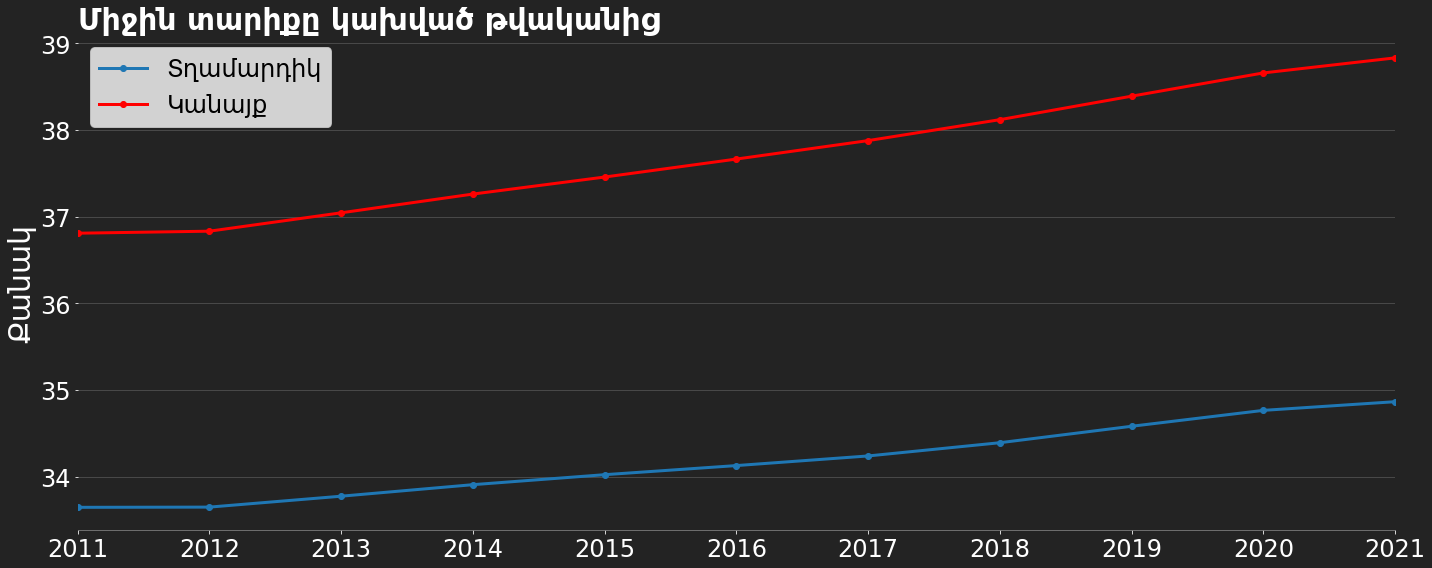

In [12]:
ages = pd.Series([ i for i in range(81) ])
ages.index += 1
men_average = []
women_average = []

for i in range(len(men_average_dataframe.columns)):
    men_average.append(sum(men_average_dataframe.iloc[:, i] * ages) / sum(men_average_dataframe.iloc[:, i]))
    women_average.append(sum(women_average_dataframe.iloc[:, i] * ages) / sum(women_average_dataframe.iloc[:, i]))

    
X = np.linspace(2011, 2021, 11)
fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(X, np.array(men_average), 'o-', linewidth=3, label="Տղամարդիկ")
ax.plot(X, np.array(women_average), 'o-', color='red', linewidth=3, label="Կանայք")

ax.set_title("Միջին տարիքը կախված թվականից", loc='left', color='white', fontsize=30, fontweight='bold')
ax.grid(axis='y', color='gray', alpha=0.5)
# ax.set_xlabel('Տարի', color='white', fontsize=30)
ax.set_ylabel('Քանակ', color='white', fontsize=30)

ax.set_facecolor('#232323')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.set_xticks(X)
ax.tick_params(axis='x', colors='white', labelsize=24)
ax.tick_params(axis='y', colors='white', labelsize=24)
ax.margins(x=0)

fig.set_facecolor('#232323')
plt.legend(fontsize=24, loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
average_dataframe = demography['Ընդամենը'].astype(str).astype(int)
average_dataframe.index -= 1
average_dataframe

3,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը,Ընդամենը
0,41426,41327,42416,41755,42995,41445,40285,37431,36352,35842,36119
1,42945,42839,40933,42044,41410,42943,41400,40243,37392,36332,35813
2,43593,44216,42812,40912,41977,41389,42922,41379,40223,37375,36324
3,40243,40595,44199,42790,40840,41958,41373,42912,41360,40212,37373
4,39365,39727,40589,44176,42720,40828,41947,41354,42901,41342,40200
...,...,...,...,...,...,...,...,...,...,...,...
76,17770,18429,18368,19536,18889,18222,18881,15757,11319,6777,6293
77,11839,12323,17412,17349,18426,17880,17211,18054,15126,10934,6415
78,12996,12294,11459,16357,16249,17285,16817,16232,17268,14428,10458
79,13294,13383,11559,10514,15311,15166,16111,15790,15266,16470,13552


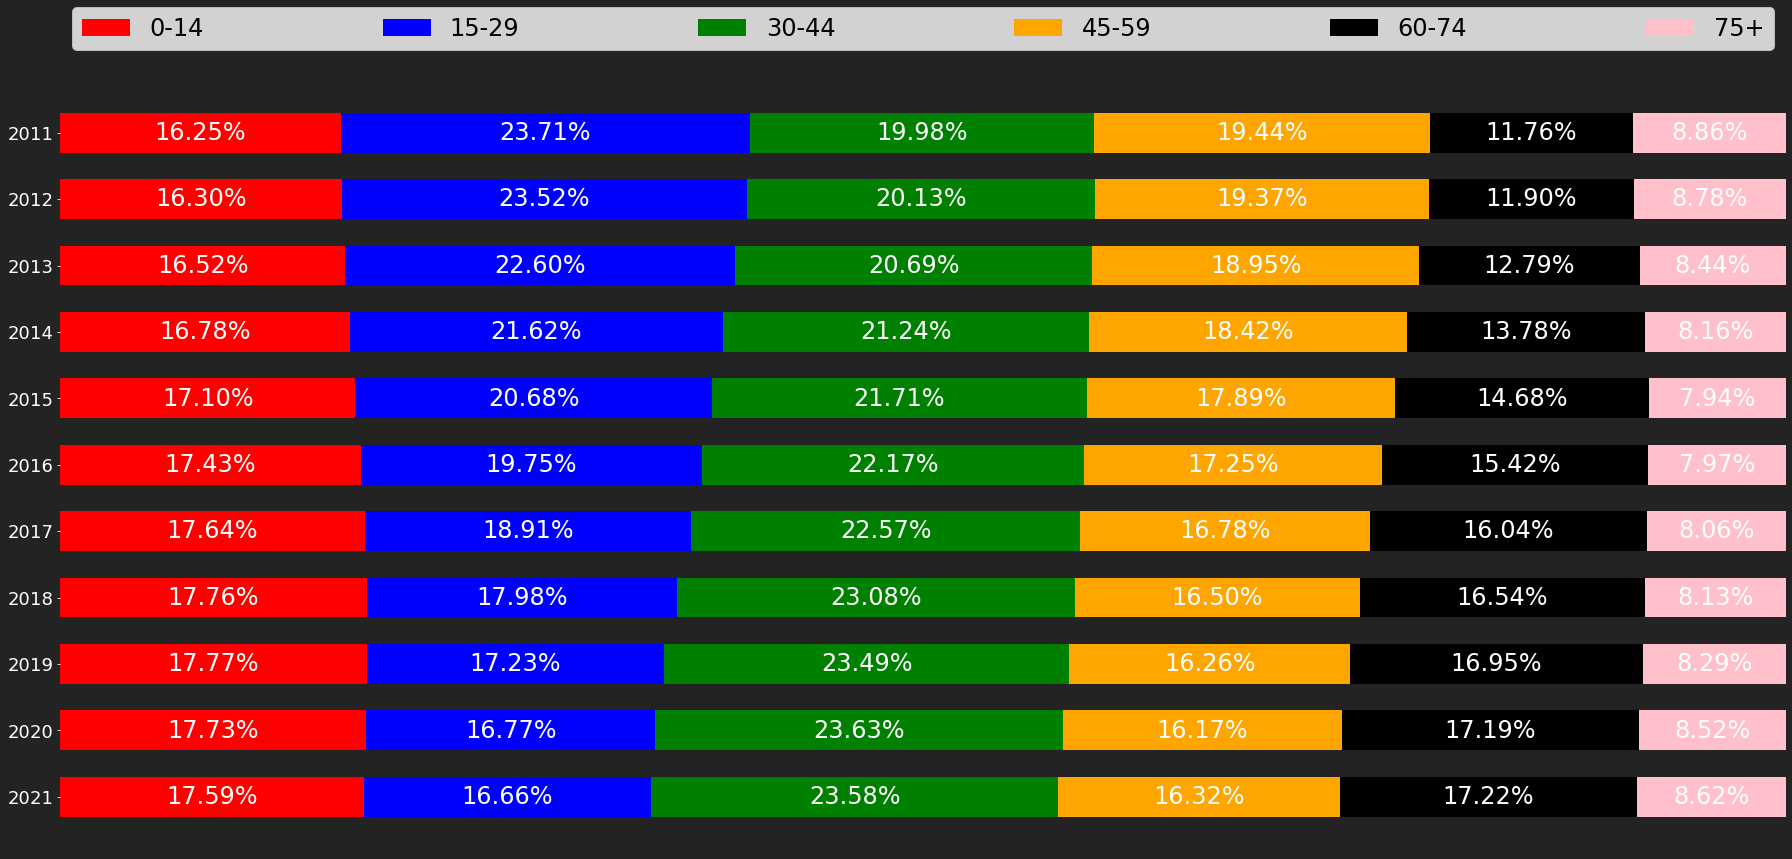

In [14]:
average_dataframe = demography['Ընդամենը'].astype(str).astype(int)

average_age_array = []
for i in range(len(average_dataframe.columns)):
    full_sum = sum(average_dataframe.iloc[:, i])
    sub_category_sum = np.array(average_dataframe.iloc[:,i].groupby(average_dataframe.index // 14).sum())
    average_age_array.append(sub_category_sum/full_sum * 100)
    

average_age_array = np.array(average_age_array)
average_age_array_cum = average_age_array.cumsum(axis=1)

category_names = ['0-14', '15-29', '30-44', '45-59', '60-74', '75+']
category_colors = ['red', 'blue', 'green', 'orange', 'black', 'pink']

labels = [ str(i) for i in range(2011, 2022) ]
fig, ax = plt.subplots(figsize=(25, 12))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(average_age_array, axis=1).max())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.tick_params(axis='x', colors='white', labelsize=18)
ax.tick_params(axis='y', colors='white', labelsize=18)
ax.set_facecolor('#232323')
fig.set_facecolor('#232323')

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = average_age_array[:, i]
    starts = average_age_array_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.6, label=colname, color=color)
    ax.bar_label(rects, fmt='%.2f%%', label_type='center', color='white', fontsize=24)
    
ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1.02, 1, 0.2), mode="expand", loc="lower left", fontsize=24)
plt.tight_layout()
plt.show()